# Projet 1 De Statistique MSDA:
### ***Exercice 1:*** (Données covid-19 Sénégal)

1. Enregistrer les données dans un format adapté pour une lecture par la suite avec Python sachant que la première ligne du fichier correspond au noms des variables. Convertir la colonne date en type datetime et supprimer toutes les lignes ayant une valeur manquante.

In [1]:
#On importe les modules (numpy, matplotlib.pyplot, pandas, seaborn )
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
pd.options.mode.chained_assignment = None  # default='warn'


In [2]:
#On importe les donnees covid-senegal.csv
data_covid=pd.read_csv('covid-senegal.csv',sep=';')

In [3]:
#La taille du tableau
data_covid.shape

(496, 6)

In [4]:
#Visualisons les donnees
data_covid

,date,tests,cas,contact,importe,communautaire
0,02/03/2020,1.0,1,0,0,0
1,03/03/2020,2.0,1,0,1,0
2,04/03/2020,2.0,2,1,1,0
3,05/03/2020,NaN,0,0,0,0
4,06/03/2020,2.0,0,0,0,0
...,...,...,...,...,...,...
491,07/07/2021,2388.0,356,127,0,229
492,08/07/2021,2166.0,354,135,1,218
493,09/07/2021,2104.0,476,215,0,261
494,10/07/2021,2762.0,380,136,0,234


In [5]:
#Convertissons date en format datetime.
data_covid['date']=pd.to_datetime(data_covid['date'])

In [6]:
#Visualisons les donnees
data_covid

,date,tests,cas,contact,importe,communautaire
0,2020-02-03,1.0,1,0,0,0
1,2020-03-03,2.0,1,0,1,0
2,2020-04-03,2.0,2,1,1,0
3,2020-05-03,NaN,0,0,0,0
4,2020-06-03,2.0,0,0,0,0
...,...,...,...,...,...,...
491,2021-07-07,2388.0,356,127,0,229
492,2021-08-07,2166.0,354,135,1,218
493,2021-09-07,2104.0,476,215,0,261
494,2021-10-07,2762.0,380,136,0,234


In [7]:
#La fonction describe genere un tableau 
#-count: compte le nombre de ligne non null pour chaque variable
#-mean: la moyenne
#-std: ecart type.
#etc
data_covid.describe()

,tests,cas,contact,importe,communautaire
count,495.000000,496.000000,496.000000,496.000000,496.000000
mean,1235.101010,97.233871,46.421371,1.227823,50.350806
std,600.291948,88.774403,39.830726,9.614725,60.133403
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,922.500000,30.000000,11.750000,0.000000,10.000000
50%,1215.000000,73.500000,36.000000,0.000000,26.000000
75%,1584.000000,130.500000,73.250000,1.000000,68.250000
max,3029.000000,529.000000,215.000000,209.000000,341.000000


In [8]:
#On constate que dans la colonne tests il ya 495 valeurs alors qu'il devrait y avoir 496 valeur donc il y a une valeur NAN
#supprimons toutes les lignes ayant une valeur manquante. On utilise la fonction dropna()
data_covid=data_covid.dropna()

In [9]:
#jettons un coup d'oeil a nos donnees
data_covid.describe()

,tests,cas,contact,importe,communautaire
count,495.000000,495.000000,495.000000,495.000000,495.000000
mean,1235.101010,97.430303,46.515152,1.230303,50.452525
std,600.291948,88.756243,39.816168,9.624293,60.151506
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,922.500000,30.000000,12.000000,0.000000,10.000000
50%,1215.000000,74.000000,36.000000,0.000000,26.000000
75%,1584.000000,131.000000,73.500000,1.000000,68.500000
max,3029.000000,529.000000,215.000000,209.000000,341.000000


2. Ajouter dans les données une nouvelle variable proportion qui représente le taux de positivité journalier.


In [10]:
#proportion=nombre_de_cas/nombre_tests*100
#Utilisons la fonction round() pour donner les resultats a 2 chiffres apres la virgule.
data_covid['proportion en %']=round(data_covid['cas']/data_covid['tests']*100,2)

In [11]:
data_covid

,date,tests,cas,contact,importe,communautaire,proportion en %
0,2020-02-03,1.0,1,0,0,0,100.00
1,2020-03-03,2.0,1,0,1,0,50.00
2,2020-04-03,2.0,2,1,1,0,100.00
4,2020-06-03,2.0,0,0,0,0,0.00
5,2020-07-03,2.0,0,0,0,0,0.00
...,...,...,...,...,...,...,...
491,2021-07-07,2388.0,356,127,0,229,14.91
492,2021-08-07,2166.0,354,135,1,218,16.34
493,2021-09-07,2104.0,476,215,0,261,22.62
494,2021-10-07,2762.0,380,136,0,234,13.76


3. Ajouter dans les données une nouvelle variable total qui représente le nombre cumulé de cas positifs du début de la pandémie jusqu’à une certaine date.

In [12]:
#Effectue l'effectif cummule avec la fonction cumsum()
data_covid['total']=data_covid['cas'].cumsum()

In [13]:
data_covid

,date,tests,cas,contact,importe,communautaire,proportion en %,total
0,2020-02-03,1.0,1,0,0,0,100.00,1
1,2020-03-03,2.0,1,0,1,0,50.00,2
2,2020-04-03,2.0,2,1,1,0,100.00,4
4,2020-06-03,2.0,0,0,0,0,0.00,4
5,2020-07-03,2.0,0,0,0,0,0.00,4
...,...,...,...,...,...,...,...,...
491,2021-07-07,2388.0,356,127,0,229,14.91,46489
492,2021-08-07,2166.0,354,135,1,218,16.34,46843
493,2021-09-07,2104.0,476,215,0,261,22.62,47319
494,2021-10-07,2762.0,380,136,0,234,13.76,47699


4. Représenter les variables tests et cas en fonction de la date dans le même graphique. Ajouter une légende dans le graphique.

In [14]:
#Changeons l'index du tableau en date 
data_covid.set_index('date',inplace=True)

In [15]:
data_covid

,tests,cas,contact,importe,communautaire,proportion en %,total
date,,,,,,,
2020-02-03,1.0,1,0,0,0,100.00,1
2020-03-03,2.0,1,0,1,0,50.00,2
2020-04-03,2.0,2,1,1,0,100.00,4
2020-06-03,2.0,0,0,0,0,0.00,4
2020-07-03,2.0,0,0,0,0,0.00,4
...,...,...,...,...,...,...,...
2021-07-07,2388.0,356,127,0,229,14.91,46489
2021-08-07,2166.0,354,135,1,218,16.34,46843
2021-09-07,2104.0,476,215,0,261,22.62,47319


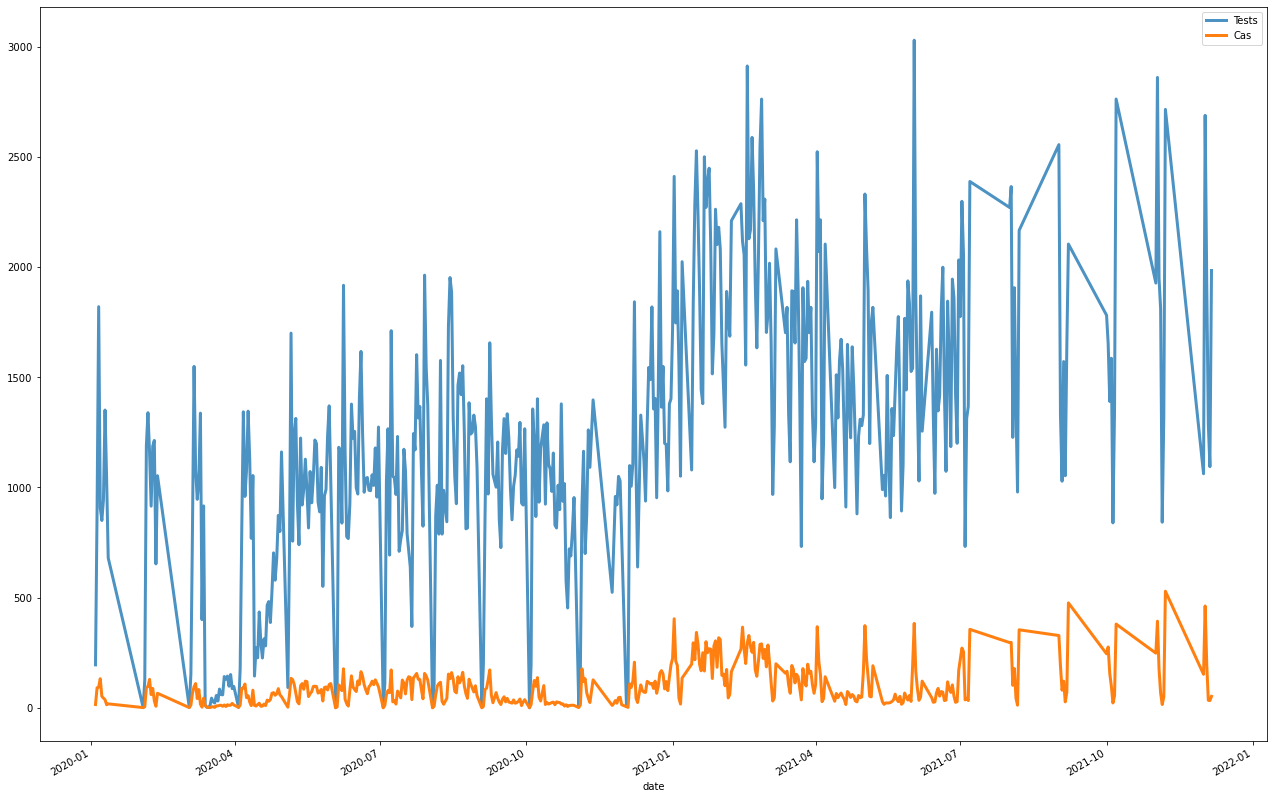

In [16]:
#tracons tests et cas avec la fonction plot()
plt.figure(figsize=(22,15))
data_covid['tests'].plot(label='Tests',lw=3,ls='-',alpha=0.8)
data_covid['cas'].plot(label='Cas',lw=3,ls='-',alpha=4)
plt.legend()
plt.show()

5. Représenter les variables communautaire et contact en fonction de la date dans le même gra- phique. Ajouter une légende dans le graphique.

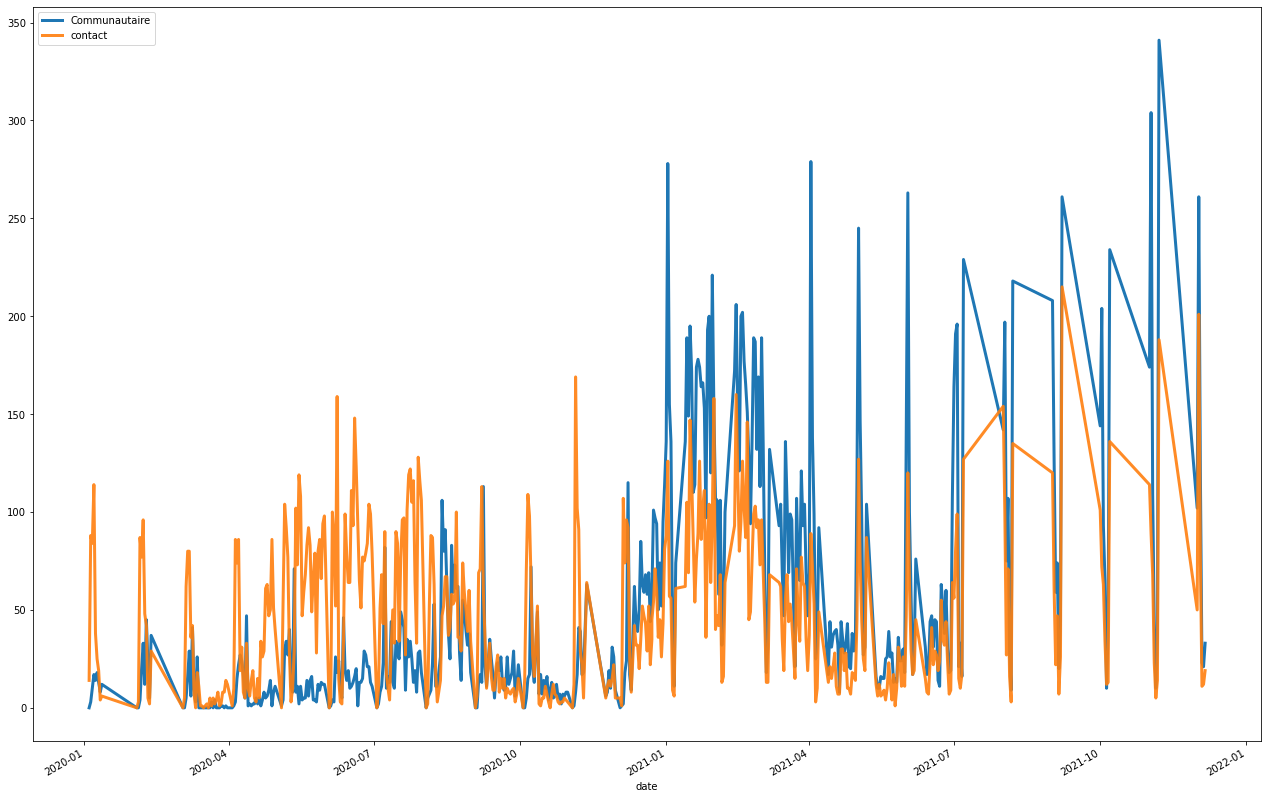

In [17]:
plt.figure(figsize=(22,15))
data_covid['communautaire'].plot(label='Communautaire',lw=3,ls='-',alpha=1)
data_covid['contact'].plot(label='contact',lw=3,ls='-',alpha=0.9)
plt.legend()
plt.show()

6. Tracer le boxplot et l’histogramme de la variable cas. Conclure sur la présence ou non d’éven- tuelles valeurs manquantes pour cette variable.


Text(0, 0.5, 'Nombre de cas covid')

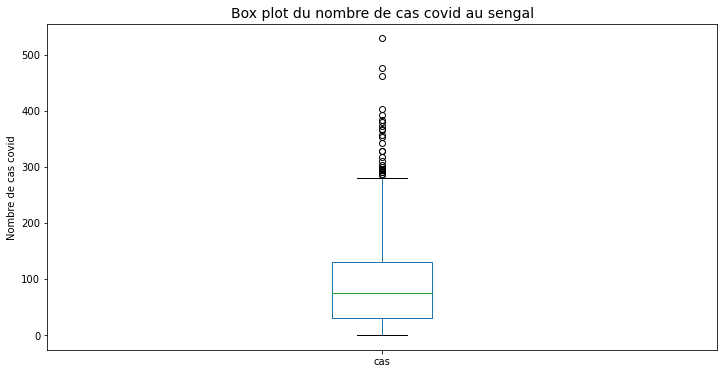

In [18]:
data_covid['cas'].plot(kind='box', figsize=(12,6))
plt.title('Box plot du nombre de cas covid au sengal', fontsize=14)
plt.ylabel('Nombre de cas covid')

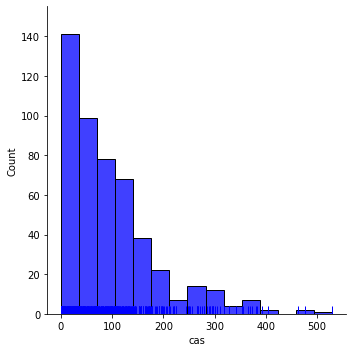

In [19]:
sns.displot(data_covid['cas'], color = 'blue', kind = 'hist', rug = True, bins=15)

***Conclusion:*** On voit que la borne inferieure du BoxPlot atteint 0, on peut conclure qu'il existe des valeurs nulles dans la variable cas. -On voit qu'entre les valeurs 423,5 et 458,5 de l'histogramme, les valeurs sont nulles ,donc il existe des valeurs nulles dans la variable cas.

7. Discrétisez la variable cas. Pour ce faire on ajoutera une variable dans le DataFrame des don- nées une nouvelle variable nommée cas_classe. Cette variable aura 4 classes :
                        [min(cas),Q1], ]Q1,Q2], ]Q2,Q3], ]Q3,max(cas)].
ou Q1, Q2, Q3 sont respectivement les 3 premiers quantiles de la variable cas, min(cas) et
max(cas) respectivement la plus petite et la plus grande valeur de la variable cas.

In [20]:
#creeons une fonction classe qui permet de classer la valeur des cas en cathegorie A,B,C,D. 
def classe(c):
    if (c >= np.min(data_covid['cas']) and c <= np.quantile(data_covid['cas'],0.25)):
        return "A"
    elif ( c > np.quantile(data_covid['cas'],0.25) and c <= np.quantile(data_covid['cas'],0.5) ) :
        return "B"
    elif  ( c > np.quantile(data_covid['cas'],0.5) and c <= np.quantile(data_covid['cas'],0.75) ):
        return "C"
    else :
        return "D"


In [21]:
#on applique cette fonction dans la variable cas et on le met dans une colonne cas_classe 
data_covid['cas_classe'] = data_covid['cas'].apply(classe)
#changer cas classe en type "Cathegorie"
data_covid['cas_classe'] = data_covid['cas_classe'].astype('category')

In [22]:
data_covid

,tests,cas,contact,importe,communautaire,proportion en %,total,cas_classe
date,,,,,,,,
2020-02-03,1.0,1,0,0,0,100.00,1,A
2020-03-03,2.0,1,0,1,0,50.00,2,A
2020-04-03,2.0,2,1,1,0,100.00,4,A
2020-06-03,2.0,0,0,0,0,0.00,4,A
2020-07-03,2.0,0,0,0,0,0.00,4,A
...,...,...,...,...,...,...,...,...
2021-07-07,2388.0,356,127,0,229,14.91,46489,D
2021-08-07,2166.0,354,135,1,218,16.34,46843,D
2021-09-07,2104.0,476,215,0,261,22.62,47319,D


8. Donner les fréquences des modalités de la nouvelle variable cas_classe.

In [23]:
#On utilise value_counts qui se trouve dans la bibliothque panda
pd.value_counts(data_covid['cas_classe'])

A    126
D    124
B    124
C    121
Name: cas_classe, dtype: int64